In [1]:
# Data locations
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA"
PATH_MS_DATA = ROOT + "\\Data\\GNPS_library_searches\\"
PATH_SAVE_MODEL = ROOT + "\\SeSiMe\\models_trained\\"
PATH_SAVE_DATA = ROOT + "\\SeSiMe\\data\\"
PATH_SESIME = ROOT + "\\SeSiMe\\"

# Import general packages
import sys
sys.path.insert(0, PATH_SESIME)

import helper_functions as functions
import MS_functions
import numpy as np

## Dataset 1: gnps search (Justin, 2018-03-23)
+ Spectral libraries search (to get spectra): https://gnps.ucsd.edu/ProteoSAFe/status.jsp?task=6e22f85aeb0744208e872d1640f508d9
+ Library matching (to get metadata): https://gnps.ucsd.edu/ProteoSAFe/status.jsp?task=03fba62d93cb4cbfa3f72106d18f7d2c

In [2]:
# data locations
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA"
PATH_MS_DATA = ROOT + "\\Data\\GNPS_library_searches\\"
PATH_SAVE_MODEL = ROOT + "\\SeSiMe\\models_trained\\"
PATH_SAVE_DATA = ROOT + "\\SeSiMe\\data\\"
PATH_SESIME = ROOT + "\\SeSiMe\\"

#PATH_NPLINKER = ROOT + "\\nplinker\\prototype\\"
mgf_file = PATH_MS_DATA + "METABOLOMICS-SNETS-6e22f85a-download_clustered_spectra-main.mgf"

In [3]:
"""
Created on Fri Nov  9 10:23:22 2018
@author: madeleineernst
"""
#############################################################################################################
#                                                                                                           #
#  compile .mgf file of unique InChIKeys and associated MS/MS spectra retrieved from GNPS Libraries         #
#                                                                                                           #
#############################################################################################################

from pyteomics import mgf, auxiliary
import pandas as pd
import numpy as np

# load GNPS library matches downloaded from https://gnps.ucsd.edu/ProteoSAFe/status.jsp?task=03fba62d93cb4cbfa3f72106d18f7d2c
lib = pd.read_csv(PATH_MS_DATA + "MOLECULAR-LIBRARYSEARCH-03fba62d-view_all_annotations_DB-main.tsv", sep = "\t")
# load SMILES and associated InChIKeys 
# SMILES were converted to InChIKeys using Marvin Beans MolConverter: https://chemaxon.com/marvin-archive/3.3.3/marvin/doc/user/molconvert.html
smiles = pd.read_csv(PATH_MS_DATA + "SMILES_GNPSLibraries.csv",sep=',', index_col = 0)
ikeys = pd.read_csv(PATH_MS_DATA + "InchiKeys_GNPSLibraries.txt",  sep='\t',header = None)

lib = lib.dropna(subset=['Smiles'])  
lib = lib[lib.Smiles != ' ']
lib['Smiles'] = lib['Smiles'].str.strip() # remove white spaces

ikeys = [j for i in ikeys.values.tolist() for j in i]
ikeys = [w.replace('InChIKey=', '') for w in ikeys]
smiles["inchikey"] = ikeys
smiles = smiles.rename(columns = {'SMILES':'Smiles'})
smiles = smiles.drop_duplicates(subset=['Smiles']) 

libcomb = pd.merge(lib, smiles,how="left",on="Smiles")
libcomb = libcomb.dropna(subset=['inchikey'])
libcomb = libcomb.drop_duplicates(subset='inchikey', keep='first', inplace=False) # remove duplicate InChIKeys

C:\Users\FlorianHuber\Anaconda3\envs\SeSiMe\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
libcomb.head()

,#Scan#,Adduct,CAS_Number,Charge,Compound_Name,Compound_Source,Data_Collector,ExactMass,FileScanUniqueID,INCHI,...,Smiles,SpecCharge,SpecMZ,SpectrumFile,SpectrumID,TIC_Query,UpdateWorkflowName,tags,internalFilename,inchikey
0,37597,M+H,NaN,1,MLS002172445-01!BRL 15572,NIH Pharmacologically Active Library,VP/LMS,406.181,spectrapklbin/spec-00000.mgf37597,NaN,...,OC(CN1CCN(CC1)c2cccc(Cl)c2)C(c3ccccc3)c4ccccc4.Cl,1,407.192,METABOLOMICS-SNETS-6e22f85a-download_clustered...,CCMSLIB00000085886,3533120.0,UPDATE-SINGLE-ANNOTATED-GOLD,,spec-00000.mgf,KQGJIKWDFWLCHO-UHFFFAOYSA-N
1,88458,M+H,NaN,1,"MLS001032355-01!N-pyridin-3-yl-2-[(4,8,8-trime...",NIH Natural Product Library,VVP/LMS,394.153,spectrapklbin/spec-00000.mgf88458,NaN,...,Cc1cc(=O)oc2c3CCC(C)(C)Oc3cc(OCC(=O)Nc4cccnc4)c12,1,395.161,METABOLOMICS-SNETS-6e22f85a-download_clustered...,CCMSLIB00000079962,2097800.0,UPDATE-SINGLE-ANNOTATED-GOLD,,spec-00000.mgf,LVQGEYGJUNSKKW-UHFFFAOYSA-N
2,88090,M+H,NaN,1,"MLS001158282-01!(2S)-2-[[(2S)-2-(1,2-dihydroim...",NIH Natural Product Library,VVP/LMS,463.222,spectrapklbin/spec-00000.mgf88090,NaN,...,CC(C)C[C@H](NC(=O)N1CCn2c1nc3ccccc23)C(=O)N[C@...,1,464.230,METABOLOMICS-SNETS-6e22f85a-download_clustered...,CCMSLIB00000079592,2165400.0,UPDATE-SINGLE-ANNOTATED-GOLD,,spec-00000.mgf,RWSJPESCUJCQNS-PMACEKPBSA-N
3,37673,M+H,NaN,1,"MLS000701320-01!N-(4,5-diphenyl-1H-pyrazolo[3,...",NIH Pharmacologically Active Library,VP/LMS,406.154,spectrapklbin/spec-00000.mgf37673,NaN,...,O=C(Nc1[nH]nc2nnc(c3ccccc3)c(c4ccccc4)c12)Nc5c...,1,407.160,METABOLOMICS-SNETS-6e22f85a-download_clustered...,CCMSLIB00000085962,3356090.0,UPDATE-SINGLE-ANNOTATED-GOLD,,spec-00000.mgf,BUUXBIIFLQVFAR-UHFFFAOYSA-N
4,37985,[M+H],"150322-43-3, 389574-19-0 (HCl), 389574-20-3 (M...",1,Prasugrel (Effient),Commercial,Garg_Neha,373.115,spectrapklbin/spec-00000.mgf37985,NaN,...,C(C(C1C(=CC=CC=1)F)N2CCC3=C(C2)C=C(S3)OC(=O)C)...,1,374.122,METABOLOMICS-SNETS-6e22f85a-download_clustered...,CCMSLIB00000078073,3051020.0,UPDATE-SINGLE-ANNOTATED-GOLD,,spec-00000.mgf,DTGLZDAWLRGWQN-UHFFFAOYSA-N


In [28]:
libcomb.loc[libcomb['#Scan#'] == 33238]

,#Scan#,Adduct,CAS_Number,Charge,Compound_Name,Compound_Source,Data_Collector,ExactMass,FileScanUniqueID,INCHI,...,Smiles,SpecCharge,SpecMZ,SpectrumFile,SpectrumID,TIC_Query,UpdateWorkflowName,tags,internalFilename,inchikey


## How to deal with '-1+' charge ?
I checked part of the metadata and "CHARGE=-1+" seems to actually mean "CHARGE=-1". So, in the following I will simply replace it in the mgf file.

In [25]:
import fileinput

with fileinput.FileInput(mgf_file, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace('-1+', '-1'), end='')

In [32]:
# modified code from madeleine -> sped up mostly
scans = libcomb['#Scan#'].tolist() #libcomb.Scan.tolist()

counter=0
with mgf.read(mgf_file) as reader:
    for i, spectrum in enumerate(reader):
        if i/5000 == i//5000: #show progress
            print("being at ",i, "of ", len(reader), "spectra.")
        if spectrum['params']['scans'] in scans:
            idx = scans.index(spectrum['params']['scans'])
            scan = scans[idx]
            if spectrum['params']['scans'] == str(scan):
                file_name = '{}.mgf'.format(PATH_MS_DATA + "GNPSLibraries_uniqueSMILES_withFeatureIDs")
                spectrum['params']['SMILES'] = libcomb.Smiles.tolist()[idx]
                spectrum['params']['InchiKey'] = libcomb.inchikey.tolist()[idx]
                counter+=1
                spectrum['params']['FEATURE_ID'] = counter
                mgf.write((spectrum,), file_name)

being at  0 of  107238 spectra.
being at  5000 of  107238 spectra.
being at  10000 of  107238 spectra.
being at  15000 of  107238 spectra.
being at  20000 of  107238 spectra.
being at  25000 of  107238 spectra.
being at  30000 of  107238 spectra.
being at  35000 of  107238 spectra.
being at  40000 of  107238 spectra.
being at  45000 of  107238 spectra.
being at  50000 of  107238 spectra.
being at  55000 of  107238 spectra.
being at  60000 of  107238 spectra.
being at  65000 of  107238 spectra.
being at  70000 of  107238 spectra.
being at  75000 of  107238 spectra.
being at  80000 of  107238 spectra.
being at  85000 of  107238 spectra.
being at  90000 of  107238 spectra.
being at  95000 of  107238 spectra.
being at  100000 of  107238 spectra.
being at  105000 of  107238 spectra.


In [5]:
# Import / Load data from dataset
results_file = "filtered_data_JustinLibrarySearch_minpeak10_loss500_2dec_exp001.json"
mgf_file = PATH_MS_DATA + "GNPSLibraries_uniqueSMILES_withFeatureIDs.mgf"

spectra_ref, spectra_dict_ref, MS_documents_ref, MS_documents_intensity_ref, sub_spectra_metadata_ref = MS_functions.load_MGF_data(PATH_SAVE_DATA,
                  mgf_file, 
                 results_file = results_file,
                 num_decimals = 2,
                 min_frag = 0.0, max_frag = 1000.0,
                 min_loss = 5.0, max_loss = 500.0,
                 min_intensity_perc = 0,
                 exp_intensity_filter = 0.01,
                 min_peaks = 10,
                 max_peaks = None,
                 peaks_per_mz = 15/200,
                 peak_loss_words = ['peak_', 'loss_'])

Spectra json file found and loaded.


# Dataset 2: all gnps library selection
+ Check notebook: SeSiMe_MS_gnps_search_libraries.ipynb
+ About 77,000 spectra

In [64]:
input_file = ROOT + "\\Data\\GNPS_all\\" + "all_gnps_with_smiles_191010.mgf"
output_file = open(ROOT + "\\Data\\GNPS_all\\" + "all_gnps_with_smiles_191010_modified.mgf", 'w')

with open(input_file, 'r') as file:
    for line in file:
        #line = file.readline()
        output_file.write(line.replace('-1+', '-1'))

In [6]:
results_file = "filtered_data_LibrariesAllSmiles_minpeak10_loss500_2dec_exp001.json"
mgf_file = ROOT + "\\Data\\GNPS_all\\" + "all_gnps_with_smiles_191010_modified.mgf"

spectra, spectra_dict, MS_documents, MS_documents_intensity, sub_spectra_metadata = MS_functions.load_MGF_data(PATH_SAVE_DATA,
                  mgf_file, 
                 results_file = results_file,
                 num_decimals = 2,
                 min_frag = 0.0, max_frag = 1000.0,
                 min_loss = 5.0, max_loss = 500.0,
                 min_intensity_perc = 0,
                 exp_intensity_filter = 0.01, #None
                 min_peaks = 10,
                 max_peaks = None,
                 peaks_per_mz = 15/200,
                 peak_loss_words = ['peak_', 'loss_'])

Could not find file  C:\OneDrive - Netherlands eScience Center\Project_Wageningen_iOMEGA\SeSiMe\data\ filtered_data_LibrariesAllSmiles_minpeak10_loss500_2dec_exp001.json
Data will be imported from  C:\OneDrive - Netherlands eScience Center\Project_Wageningen_iOMEGA\Data\GNPS_all\all_gnps_with_smiles_191010_modified.mgf


C:\Users\FlorianHuber\Anaconda3\envs\SeSiMe\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\OneDrive - Netherlands eScience Center\Project_Wageningen_iOMEGA\SeSiMe\MS_functions.py:345: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*x)
C:\Users\FlorianHuber\Anaconda3\envs\SeSiMe\lib\site-packages\scipy\optimize\minpack.py:780: RuntimeWarning: overflow encountered in multiply
  pcov = pcov * s_sq


RuntimeError for  92  peaks. Use mean intensity as threshold.
RuntimeError for  114  peaks. Use mean intensity as threshold.
RuntimeError for  180  peaks. Use mean intensity as threshold.
Unclear TypeError for  127  peaks. Use mean intensity as threshold.
[] and y:  []
RuntimeError for  184  peaks. Use mean intensity as threshold.
RuntimeError for  228  peaks. Use mean intensity as threshold.
RuntimeError for  109  peaks. Use mean intensity as threshold.
RuntimeError for  85  peaks. Use mean intensity as threshold.
RuntimeError for  105  peaks. Use mean intensity as threshold.
RuntimeError for  273  peaks. Use mean intensity as threshold.
RuntimeError for  287  peaks. Use mean intensity as threshold.
RuntimeError for  81  peaks. Use mean intensity as threshold.
RuntimeError for  78  peaks. Use mean intensity as threshold.
Unclear TypeError for  100  peaks. Use mean intensity as threshold.
[] and y:  []
RuntimeError for  180  peaks. Use mean intensity as threshold.
RuntimeError for  231

No losses detected for:  18294 27268
  Created documents for  18300  of  56102  spectra.No losses detected for:  18304 27281
No losses detected for:  18318 27301
No losses detected for:  18324 27308
No losses detected for:  18343 27329
No losses detected for:  18353 27345
No losses detected for:  18360 27357
No losses detected for:  18381 27392
No losses detected for:  18393 27408
No losses detected for:  18399 27416
  Created documents for  18400  of  56102  spectra.No losses detected for:  18478 27538
  Created documents for  18700  of  56102  spectra.No losses detected for:  18747 27907
No losses detected for:  18761 27924
  Created documents for  18900  of  56102  spectra.No losses detected for:  18910 28115
  Created documents for  19000  of  56102  spectra.No losses detected for:  19085 28337
  Created documents for  19200  of  56102  spectra.No losses detected for:  19218 28494
No losses detected for:  19228 28507
No losses detected for:  19247 28536
  Created documents for  193

  Created documents for  32800  of  56102  spectra.No losses detected for:  32815 49917
No losses detected for:  32816 49918
No losses detected for:  32818 49920
No losses detected for:  32819 49921
No losses detected for:  32820 49922
No losses detected for:  32830 49932
No losses detected for:  32831 49933
No losses detected for:  32832 49934
  Created documents for  32900  of  56102  spectra.No losses detected for:  32971 50073
No losses detected for:  32980 50082
No losses detected for:  32983 50085
No losses detected for:  32984 50086
No losses detected for:  32985 50087
No losses detected for:  32995 50097
No losses detected for:  32998 50100
No losses detected for:  32999 50101
  Created documents for  33000  of  56102  spectra.No losses detected for:  33000 50102
No losses detected for:  33070 50172
No losses detected for:  33079 50181
No losses detected for:  33080 50182
  Created documents for  33100  of  56102  spectra.No losses detected for:  33107 50209
No losses detected 

No losses detected for:  40413 57516
No losses detected for:  40414 57517
No losses detected for:  40416 57519
No losses detected for:  40417 57520
No losses detected for:  40418 57521
No losses detected for:  40424 57527
No losses detected for:  40428 57531
No losses detected for:  40429 57532
No losses detected for:  40430 57533
No losses detected for:  40455 57558
No losses detected for:  40456 57559
No losses detected for:  40457 57560
No losses detected for:  40462 57565
No losses detected for:  40464 57567
No losses detected for:  40465 57568
No losses detected for:  40466 57569
No losses detected for:  40467 57570
No losses detected for:  40468 57571
No losses detected for:  40469 57572
  Created documents for  40500  of  56102  spectra.No losses detected for:  40517 57620
No losses detected for:  40562 57665
No losses detected for:  40574 57677
No losses detected for:  40599 57702
  Created documents for  40600  of  56102  spectra.No losses detected for:  40600 57703
No losses 

  Created documents for  44100  of  56102  spectra.No losses detected for:  44174 61277
No losses detected for:  44176 61279
No losses detected for:  44177 61280
  Created documents for  44300  of  56102  spectra.No losses detected for:  44300 61403
  Created documents for  44400  of  56102  spectra.No losses detected for:  44420 61523
No losses detected for:  44423 61526
No losses detected for:  44432 61535
No losses detected for:  44433 61536
No losses detected for:  44434 61537
No losses detected for:  44435 61538
  Created documents for  44500  of  56102  spectra.No losses detected for:  44538 61641
No losses detected for:  44541 61644
No losses detected for:  44549 61652
No losses detected for:  44552 61655
No losses detected for:  44555 61658
No losses detected for:  44558 61661
  Created documents for  44700  of  56102  spectra.No losses detected for:  44759 61862
No losses detected for:  44762 61865
No losses detected for:  44764 61867
No losses detected for:  44765 61868
No lo

No losses detected for:  48956 66059
No losses detected for:  48959 66062
No losses detected for:  48960 66063
No losses detected for:  48961 66064
No losses detected for:  48962 66065
No losses detected for:  48963 66066
No losses detected for:  48989 66092
No losses detected for:  48990 66093
  Created documents for  49200  of  56102  spectra.No losses detected for:  49236 66339
No losses detected for:  49237 66340
No losses detected for:  49238 66341
No losses detected for:  49239 66342
No losses detected for:  49240 66343
No losses detected for:  49241 66344
No losses detected for:  49242 66345
No losses detected for:  49243 66346
No losses detected for:  49244 66347
No losses detected for:  49245 66348
No losses detected for:  49246 66349
No losses detected for:  49247 66350
No losses detected for:  49248 66351
No losses detected for:  49249 66352
No losses detected for:  49250 66353
  Created documents for  49300  of  56102  spectra.No losses detected for:  49352 66455
No losses 

In [7]:
len(spectra), len(spectra_ref)

(56102, 12414)

# Compare dataset and find overlap

### Find matches based on pepmass

In [22]:
# Compare allGNPS and uniquesmiles MGFs
decimals = 3

pepmasses = []
for spec in spectra_ref:
    pepmasses.append(spec.metadata['pepmass'][0])

target_mz = np.array(pepmasses)
target_mz  = np.round(target_mz, decimals)


pepmasses = []
for spec in spectra:
    pepmasses.append(spec.metadata['pepmass'][0])

allGNPS_mz = np.array(pepmasses)
allGNPS_mz  = np.round(allGNPS_mz, decimals)

In [23]:
find_precursor_matches = []
find_precursor_matches_confirmed = []
find_precursor_matches_not_confirmed = []
find_precursor_matches_1 = []
find_target_matched = np.zeros((len(spectra)))

for i, pepmass in enumerate(allGNPS_mz):
    found_ones = np.where(target_mz == np.round(pepmass, decimals))[0]
    if len(found_ones) > 0:
        find_precursor_matches.append(1)
        cosine_scores = []
        for one in found_ones:
            cosine_scores.append(MS_functions.cosine_score(spectra[i], spectra_ref[one], tol = 0.005)[0])
        find_precursor_matches_1.append((i, precursor_mz, found_ones, cosine_scores))   
        if max(cosine_scores) > 0.5:
            find_precursor_matches_confirmed.append((i, max(cosine_scores)))
        else:
            find_precursor_matches_not_confirmed.append((i, max(cosine_scores)))
    else:
        find_precursor_matches.append(0)

print("Found", np.sum(np.array(find_precursor_matches)), " matches.")
found_IDX = np.where(np.array(find_precursor_matches) == 1)

print("Found", len(find_precursor_matches_confirmed), " cosine score confirmed matches.")

Found 20733  matches.
Found 8290  cosine score confirmed matches.


## Further inspect samples...

In [29]:
find_precursor_matches_1[5]

(45,
 177.019,
 array([9707, 9739], dtype=int64),
 [0.5972478863299767, 0.029964320507106974])

In [30]:
spectra[45].metadata['pepmass'][0], spectra_ref[9707].metadata['pepmass'][0]

(152.071, 152.071)

In [52]:
spectra[45].metadata['smiles'], spectra_ref[9707].metadata['smiles']

('CC(=O)NC1=CC=C(O)C=C1', 'C1=CC(=C(C=C1CCN)O)O')

In [71]:
from matplotlib import pyplot as plt

def compare_spectra(spec1, spec2, min_mz = None, max_mz = None):
    """ Plot different spectra together to compare.
    """
    plt.figure(figsize=(10,10))

    peak_number = []
    new_min_mz = 9999
    new_max_mz = 0
    colors = ['crimson', 'teal']
    for i, spec in enumerate([spec1, spec2]):
        peaks = np.array(spec.peaks.copy())
        peak_number.append(len(peaks))
        peaks[:,1] = peaks[:,1]/np.max(peaks[:,1]); 

        if new_min_mz > np.min(peaks[:,0]):
            new_min_mz = np.min(peaks[:,0])
        if new_max_mz < np.max(peaks[:,0]):
            new_max_mz = np.max(peaks[:,0])

        markerline, stemlines, baseline = plt.stem(peaks[:,0], (-1)**(i+1)*peaks[:,1], linefmt='-', markerfmt='.', basefmt='r-')
        plt.setp(stemlines, 'color', colors[i])
    
    if min_mz == None: #then update
        min_mz = max(0, (new_min_mz - 5))
    if max_mz == None: #then update
        max_mz = new_max_mz + 10
        
    plt.xlim((min_mz, max_mz))
    plt.grid(True)
    plt.title('Spectrum')
    plt.xlabel('m/z')
    plt.ylabel('peak intensity')
    
    plt.show()
    
    print("Number of peaks: ", peak_number)

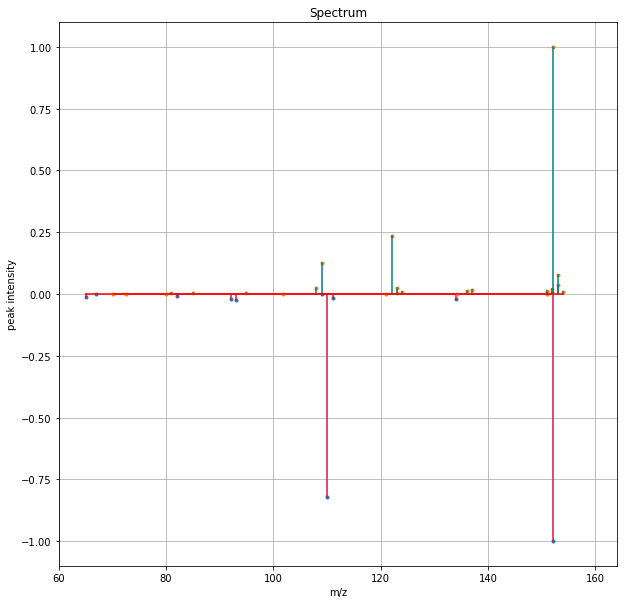

Number of peaks:  [10, 28]


In [72]:
compare_spectra(spectra[45],spectra_ref[9707], min_mz = None, max_mz = None)

In [53]:
find_precursor_matches_1[6]

(51,
 177.019,
 array([2981, 7315], dtype=int64),
 [0.7392956829155356, 0.7392956829155356])

In [54]:
spectra[51].metadata['pepmass'][0], spectra_ref[2981].metadata['pepmass'][0]

(198.135, 198.13499)

In [55]:
spectra[51].metadata['smiles'], spectra_ref[2981].metadata['smiles']

('CCNC1=NC(=O)N=C(NC(C)C)N1', 'c1(nc(nc(n1)OC)NCC)NCC')

In [60]:
spectra[51].metadata['inchikey'], spectra_ref[2981].metadata['inchikey']

('NFMIMWNQWAWNDW-UHFFFAOYSA-N', 'HKAMKLBXTLTVCN-UHFFFAOYSA-N')

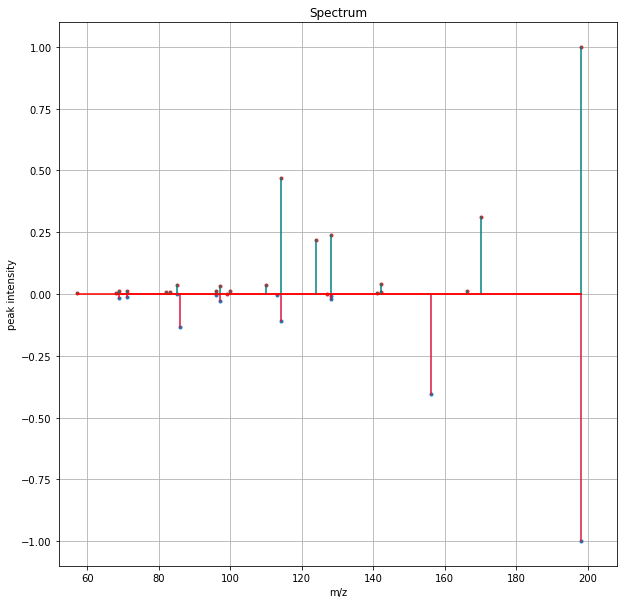

Number of peaks:  [12, 22]


In [73]:
compare_spectra(spectra[51],spectra_ref[2981], min_mz = None, max_mz = None)

## Matches with higher cosine score only

In [76]:
cosine_threshold = 0.7
cosine_tol = 0.01

find_precursor_matches = []
find_precursor_matches_confirmed = []
find_precursor_matches_not_confirmed = []
find_precursor_matches_1 = []
find_target_matched = np.zeros((len(spectra)))

for i, pepmass in enumerate(allGNPS_mz):
    found_ones = np.where(target_mz == np.round(pepmass, decimals))[0]
    if len(found_ones) > 0:
        find_precursor_matches.append(1)
        cosine_scores = []
        for one in found_ones:
            cosine_scores.append(MS_functions.cosine_score(spectra[i], spectra_ref[one], tol = cosine_tol)[0])
        find_precursor_matches_1.append((i, precursor_mz, found_ones, cosine_scores))   
        if max(cosine_scores) > cosine_threshold:
            find_precursor_matches_confirmed.append((i, precursor_mz, found_ones, cosine_scores))
        else:
            find_precursor_matches_not_confirmed.append((i, max(cosine_scores)))
    else:
        find_precursor_matches.append(0)

print("Found", np.sum(np.array(find_precursor_matches)), " matches.")
found_IDX = np.where(np.array(find_precursor_matches) == 1)

print("Found", len(find_precursor_matches_confirmed), " cosine score confirmed matches.")

Found 20733  matches.
Found 6980  cosine score confirmed matches.


In [78]:
find_precursor_matches_confirmed[1]

(54,
 177.019,
 array([10024, 11186], dtype=int64),
 [0.4052961517229117, 0.9236731883370667])

In [83]:
ID1, ID2 = 54, 11186

print("pepmasses: ", spectra[ID1].metadata['pepmass'][0], spectra_ref[ID2].metadata['pepmass'][0])
print("Smiles: ", spectra[ID1].metadata['smiles'], "vs.: ", spectra_ref[ID2].metadata['smiles'])
print("Inchikeys: ", spectra[ID1].metadata['inchikey'], "vs.: ", spectra_ref[ID2].metadata['inchikey'])

pepmasses:  181.072 181.07201
Smiles:  CN1C2=C(NC=N2)C(=O)N(C)C1=O vs.:  N1(C(N(C2=C(C1=O)NC=N2)C)=O)C.N3(C(N(C4=C(C3=O)NC=N4)C)=O)C.NCCN
Inchikeys:  ZFXYFBGIUFBOJW-UHFFFAOYSA-N vs.:  FQPFAHBPWDRTLU-UHFFFAOYSA-N


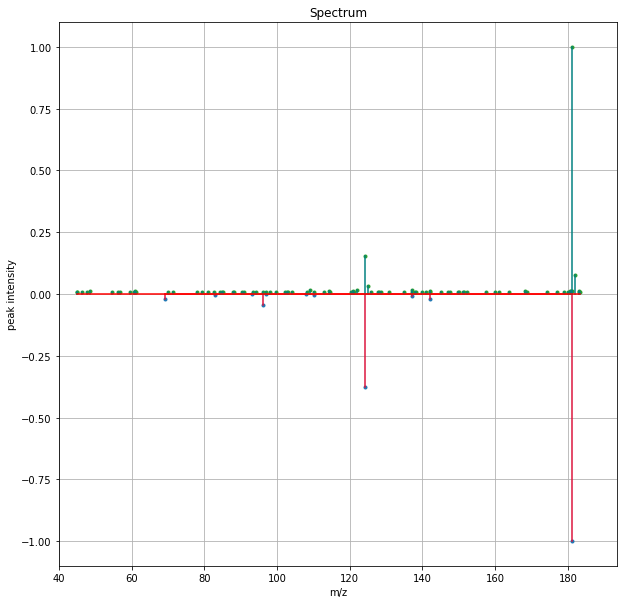

Number of peaks:  [11, 88]


In [84]:
compare_spectra(spectra[ID1],spectra_ref[ID2], min_mz = None, max_mz = None)

### Find matches based on inchikeys

In [92]:
# Compare allGNPS and uniquesmiles MGFs
inchikeys = []
for spec in spectra:
    inchikeys.append(spec.metadata['inchikey'])

inchikeys_ref = []
for spec in spectra_ref:
    inchikeys_ref.append(spec.metadata['inchikey'])

In [89]:
inchikeys.index('WIIZWVCIJKGZOK-RKDXNWHRSA-N')

0

In [94]:
inchi_matches = []
for m, inchikey in enumerate(inchikeys_ref):
    if inchikey in inchikeys:
        inchi_matches.append((m, inchikeys.index(inchikey)))

In [95]:
len(inchi_matches)

7846

In [96]:
inchi_matches[:10]

[(3, 45039),
 (10, 26183),
 (11, 23508),
 (13, 33622),
 (14, 23660),
 (16, 23911),
 (17, 36361),
 (20, 3498),
 (23, 36754),
 (35, 49641)]

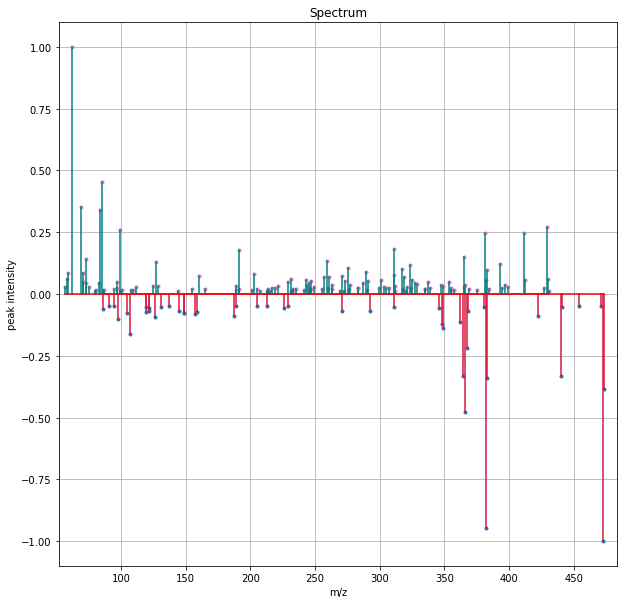

Number of peaks:  [45, 131]


In [99]:
ID1, ID2 = inchi_matches[0]
compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)

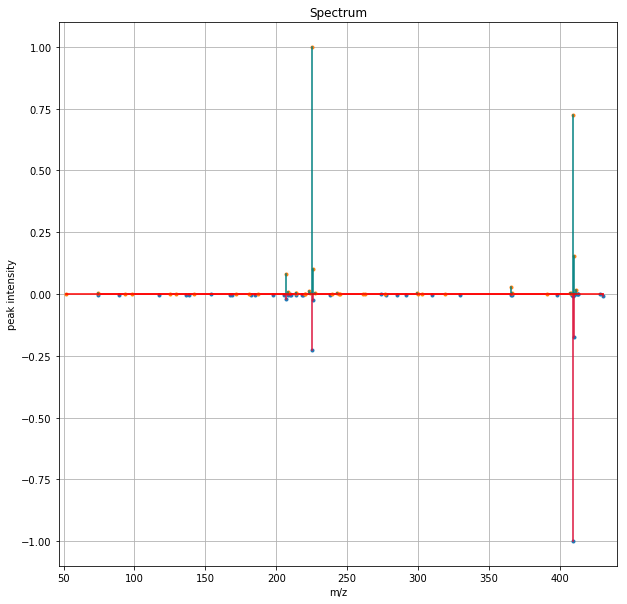

Number of peaks:  [50, 40]


In [102]:
ID1, ID2 = inchi_matches[3]
compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)

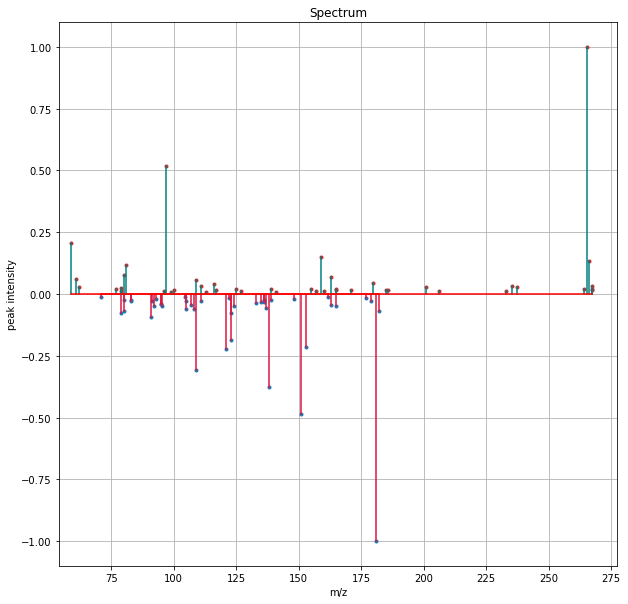

Number of peaks:  [42, 43]


In [108]:
ID1, ID2 = inchi_matches[9]
compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)